In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

In [2]:
# url = "https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls"
# 
# df_raw = pd.read_excel(url)
# df_raw.to_excel('data/data.xlsx', index=False)

## The Business Problem
Our client is a credit card company. They have brought us a dataset that includes 
some demographics and recent financial data, over the past 6 months, for a sample 
of 30,000 of their account holders. This data is at the credit account level; in other 
words, there is one row for each account (you should always clarify what the 
definition of a row is, in a dataset). Rows are labeled by whether, in the next month 
after the 6-month historical data period, an account owner has defaulted, or in other 
words, failed to make the minimum payment.

## Goal
Your goal is to develop a predictive model for whether an account will default next 
month, given demographics and historical data. Later in the book, we'll discuss the 
practical application of the model.

The data is already prepared, and a data dictionary is available. The dataset supplied 
with the book, default_of_credit_card_clients__courseware_
version_1_21_19.xls, is a modified version of this dataset in the UCI Machine 
Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. 
Have a look at that web page, which includes the data dictionary. 

## Dictionary
`LIMIT_BAL`: Amount of credit provided (in New Taiwanese (NT) dollar) including 
individual consumer credit and the family (supplementary) credit.

`SEX`: Gender (1 = male; 2 = female).

`EDUCATION`: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

`MARRIAGE`: Marital status (1 = married; 2 = single; 3 = others).

`AGE`: Age (year).

`PAY_1–PAY_6`: A record of past payments. Past monthly payments, recorded from April to September, are stored in these columns.
`PAY_1` represents the repayment status in September; `PAY_2` is the repayment status in August; and so on up to `PAY_6`, which represents the repayment status in April.

The measurement scale for the repayment status is as follows: 
- -1 = pay duly; 
- 1 = payment delay for 1 month; 
- 2 = payment delay for 2 months; and so on up to 
- 8 = payment delay for 8 months; 
- 9 = payment delay for 9 months and above. 

`BILL_AMT1–BILL_AMT6`: Bill statement amount (in NT dollar). 
`BILL_AMT1` represents the bill statement amount in September; 
`BILL_AMT2` represents the bill statement amount in August; and so on up to 
`BILL_AMT6`, which represents the bill statement amount in April.

`PAY_AMT1`–`PAY_AMT6`: Amount of previous payment (NT dollar). 
`PAY_AMT1` represents the amount paid in September; `PAY_AMT2` represents the amount paid in August; and so on up to `PAY_AMT6`, which represents the amount paid in April.

# Data Exploration and Cleaning

In [3]:
df = pd.read_excel('data/data.xlsx')
print(df)

                  ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE PAY_1  PAY_2  \
0      798fc410-45c1      20000    2          2         1   24     2      2   
1      8a8c8f3b-8eb4     120000    2          2         2   26    -1      2   
2      85698822-43f5      90000    2          2         2   34     0      0   
3      0737c11b-be42      50000    2          2         1   37     0      0   
4      3b7f77cc-dbc0      50000    1          2         1   57    -1      0   
...              ...        ...  ...        ...       ...  ...   ...    ...   
29995  ecff42d0-bdc6     220000    1          3         1   39     0      0   
29996  99d1fa0e-222b     150000    1          3         2   43    -1     -1   
29997  95cdd3e7-4f24      30000    1          2         2   37     4      3   
29998  00d03f02-04cd      80000    1          3         1   41     1     -1   
29999  15d69f9f-5ad3      50000    1          2         1   46     0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BIL

In [4]:
print(f'shape of the dataset: {df.shape} and columns of the dataset: {df.columns}')

shape of the dataset: (30000, 25) and columns of the dataset: Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [5]:
# projecao do dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# contagem de ID's unicos
df['ID'].nunique()

29687

In [7]:
# dataframe com contagem dos ID's
id_counts = df['ID'].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [8]:
# verificando a quantidade de ID's duplicados
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [9]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [10]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [11]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [12]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [13]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_zero_mask = df == 0

In [15]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)

In [16]:
sum(feature_zero_mask)

315

In [17]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [18]:
df_clean_1.shape

(29685, 25)

In [19]:
df_clean_1['ID'].nunique()

29685

In [20]:
df_clean_1.to_csv('data/df_clean_1.csv', index=False)
df_clean_1 = pd.read_csv('data/df_clean_1.csv')

In [21]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [22]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [23]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [24]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [25]:
sum(valid_pay_1_mask)

26664

In [26]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [27]:
df_clean_2.shape

(26664, 25)

In [28]:
df_clean_2['PAY_1'] = df_clean_2['PAY_2'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


- -2 means the account started that month with a zero balance and never used any credit.
- -1 means the account had a balance that was paid in full.
- 0 means that at least the minimum payment was made, but the entire balance wasn't paid (that is, a positive balance was carried to the next month).

In [29]:
df_clean_2.to_csv('data/df_clean_2.csv')

## Data Quality Assurance and Exploration

In [30]:
df_clean_2 = pd.read_csv('data/df_clean_2.csv')

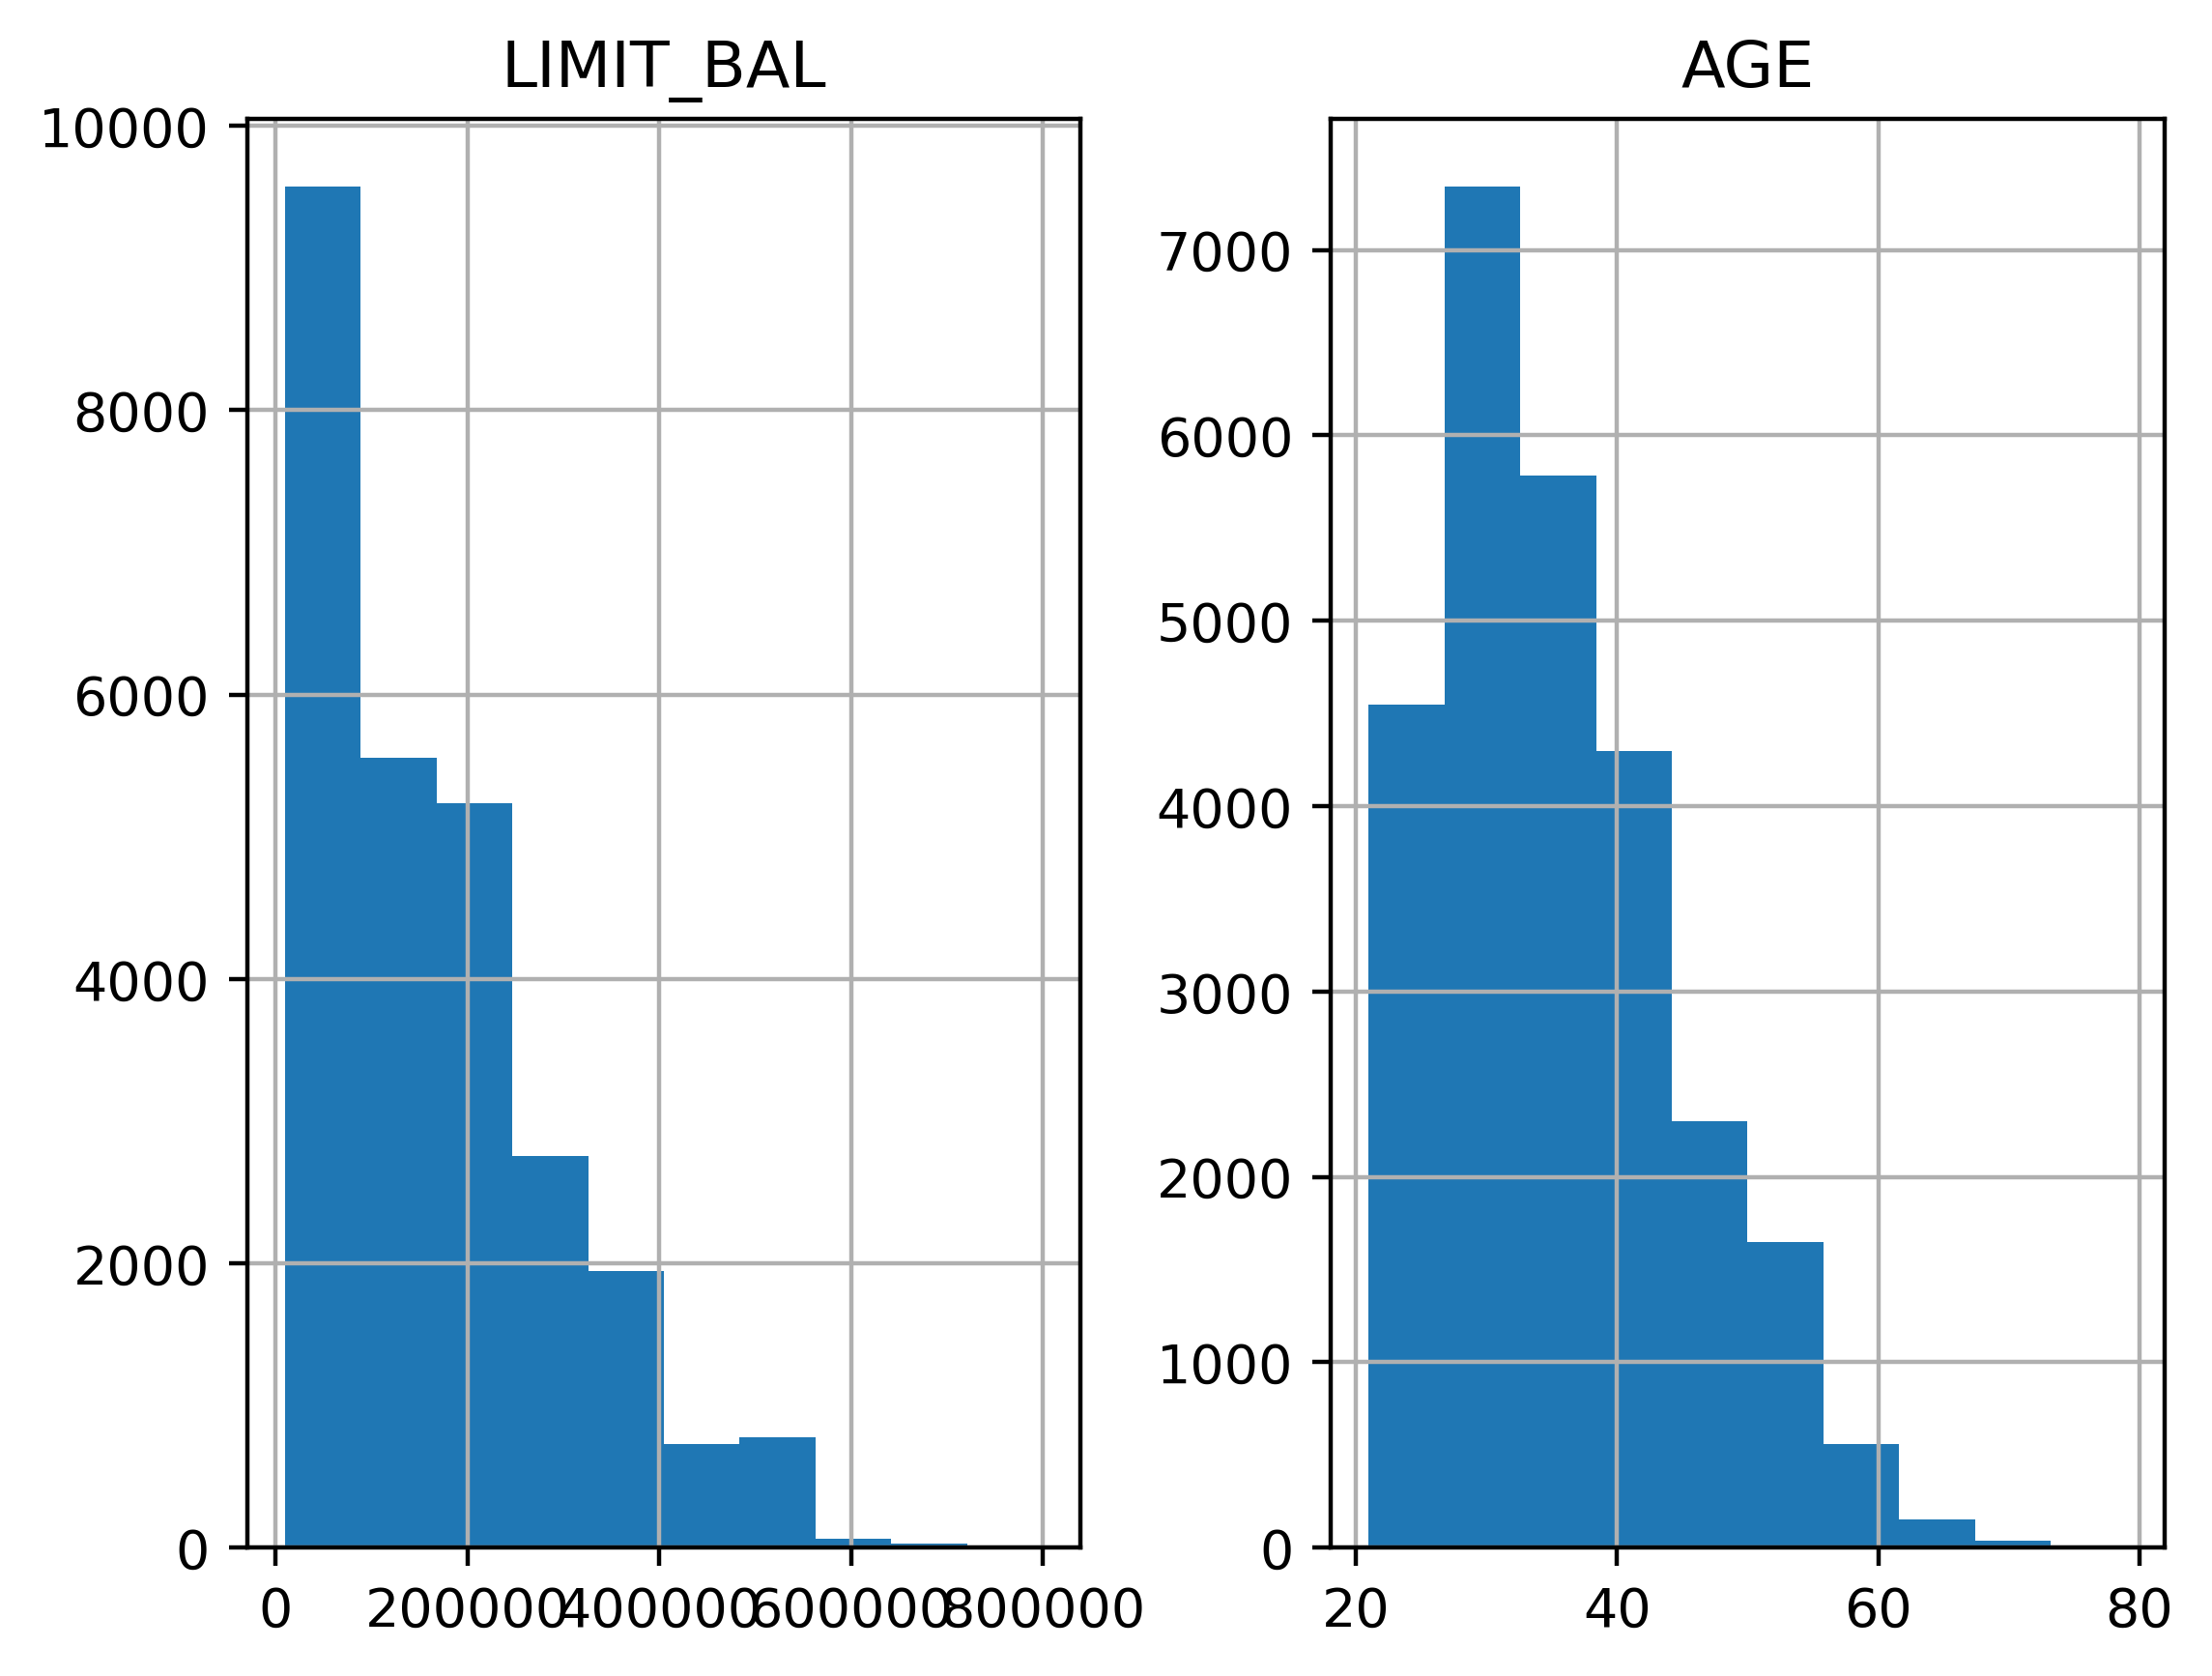

In [31]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist();

In [32]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [33]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [34]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [35]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [36]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [37]:
df_clean_2.to_csv('data/df_clean_2_01.csv', index=False)

Text(0.5, 0, 'Education level: ordinal encoding')

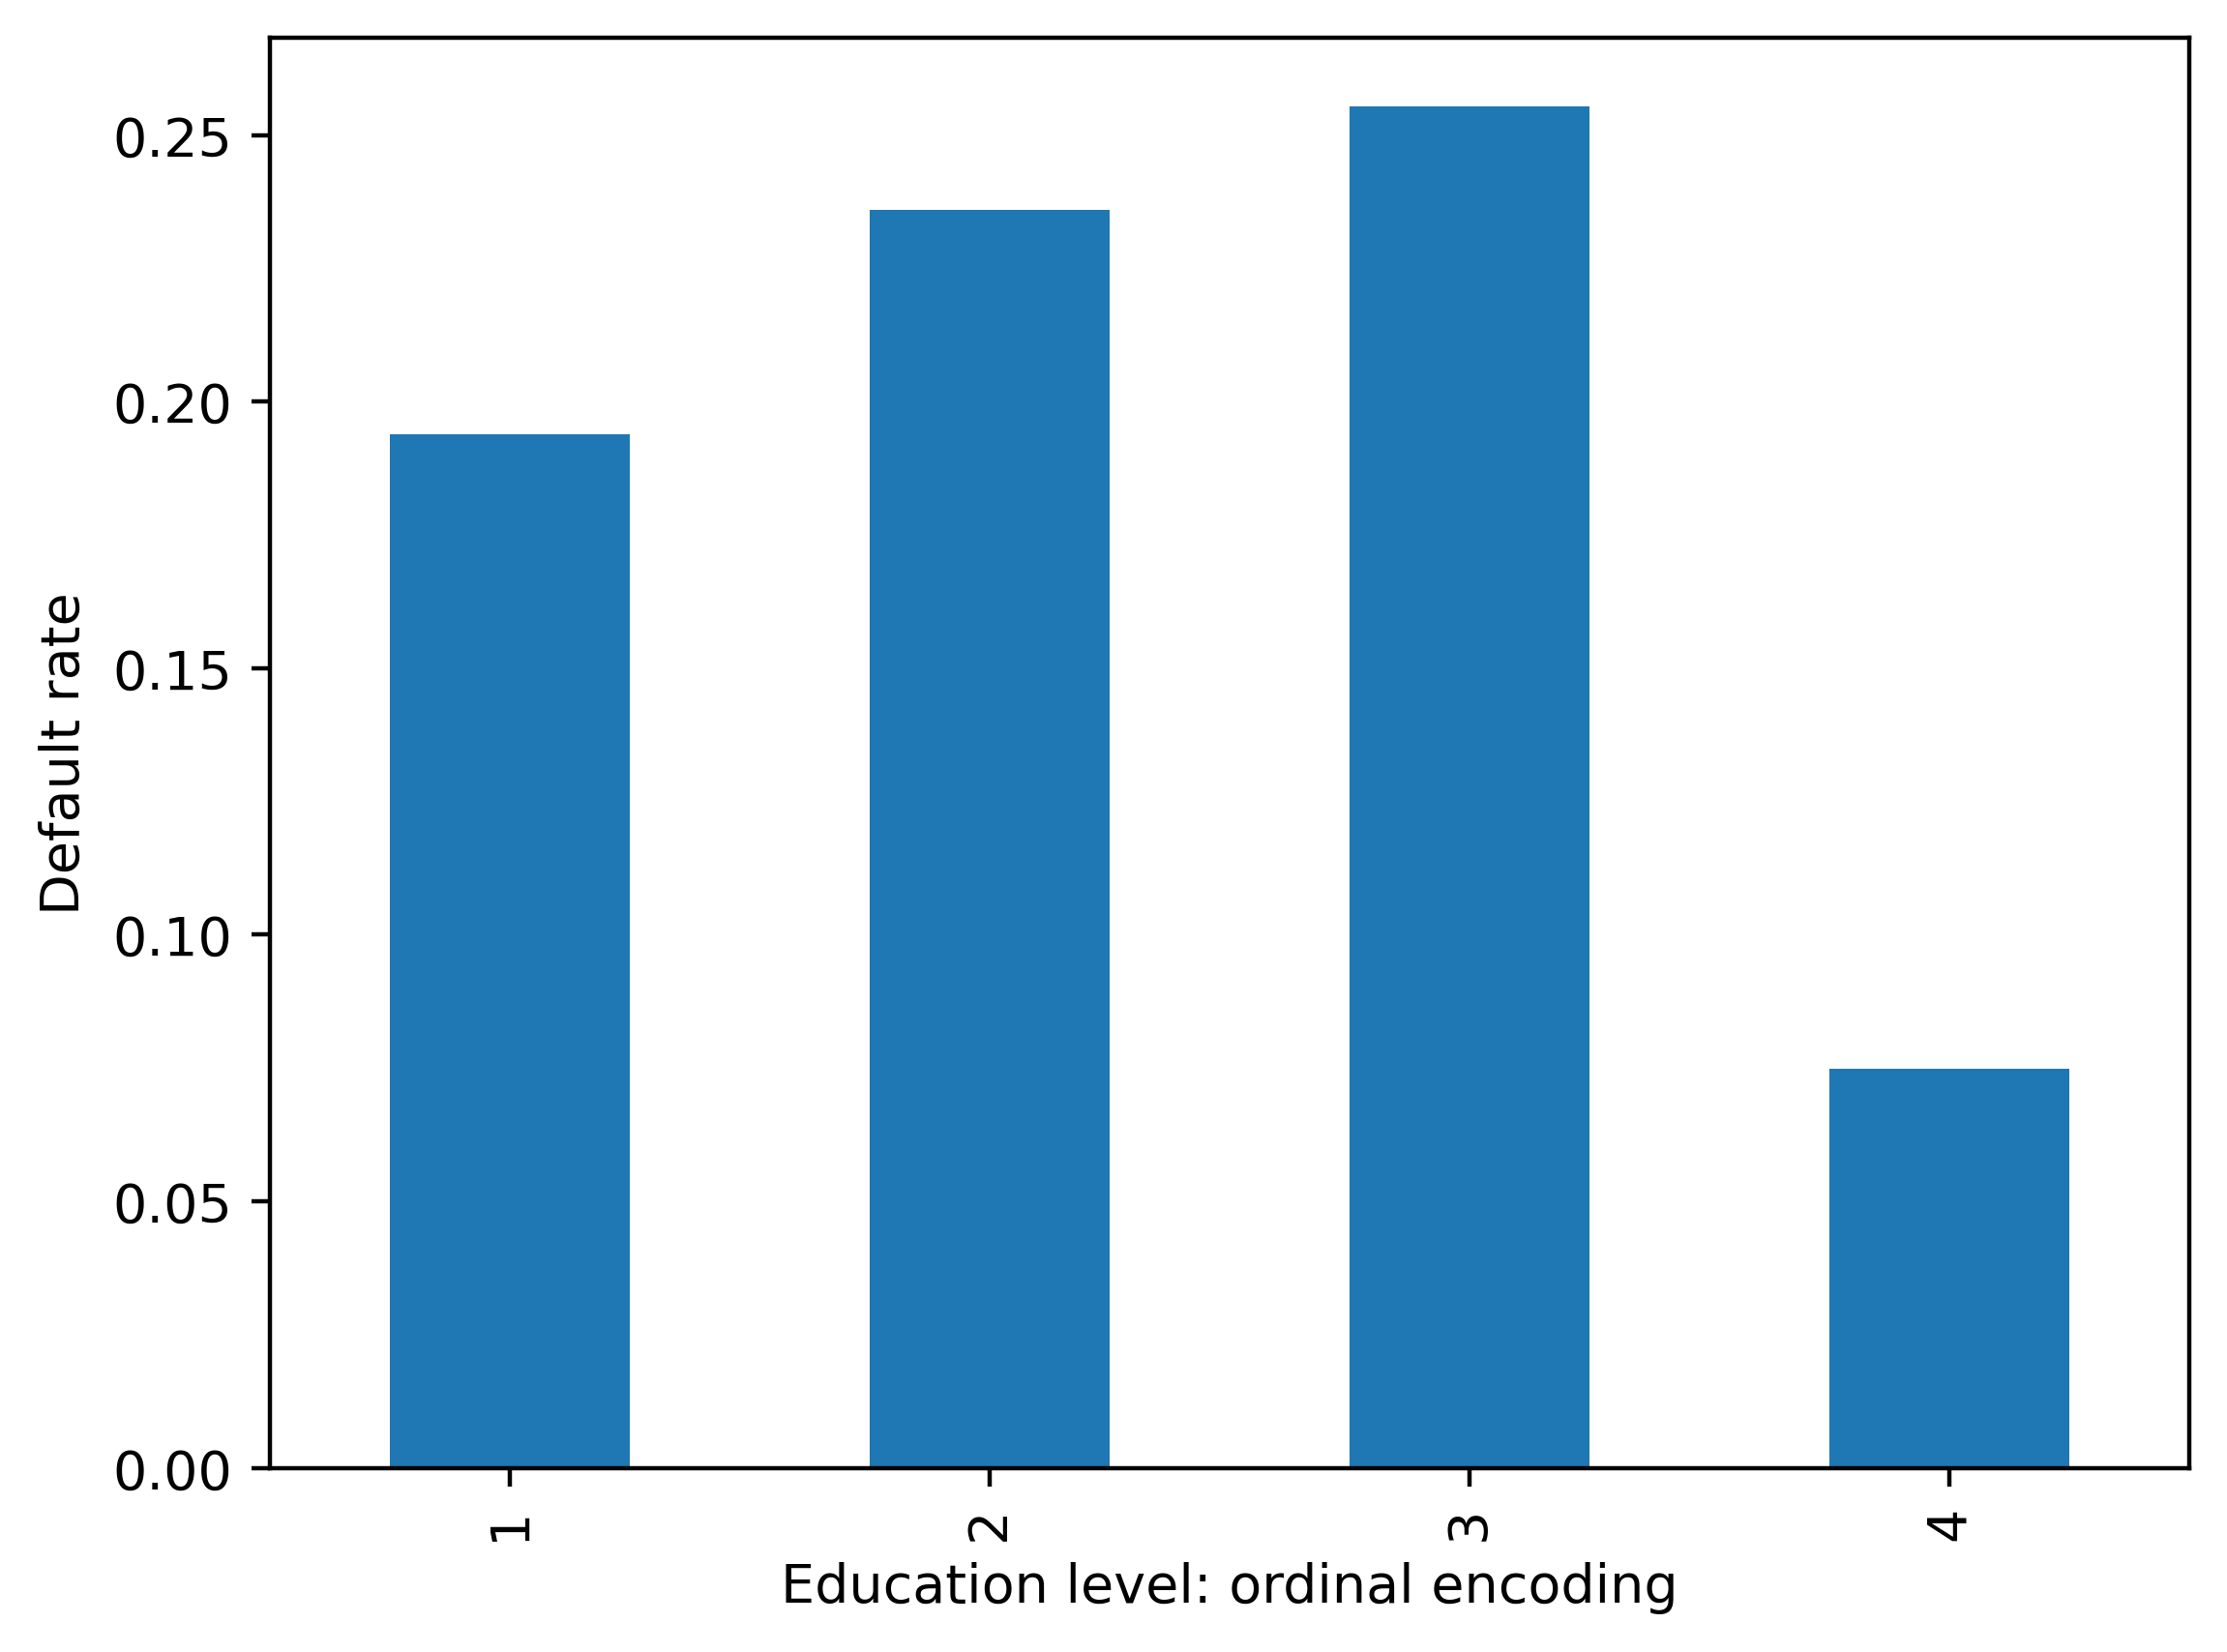

In [38]:
df_clean_2 = pd.read_csv('data/df_clean_2_01.csv')
df_clean_2.groupby('EDUCATION').agg({'default payment next ' 'month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [39]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [40]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [41]:
cat_mapping = { 1: "graduate school",
                2: "university", 
                3: "high school",
                4: "others" }


In [42]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [43]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT']).astype(int)
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [44]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [45]:
df_with_ohe.to_csv('data/Chapter_1_cleaned_data.csv', index=False)

## Exploring the Financial History Features in the Dataset

In [46]:
df = pd.read_csv('data/Chapter_1_cleaned_data.csv')

In [47]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [48]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.133363,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.198640,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [49]:
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: count, dtype: int64

<Axes: >

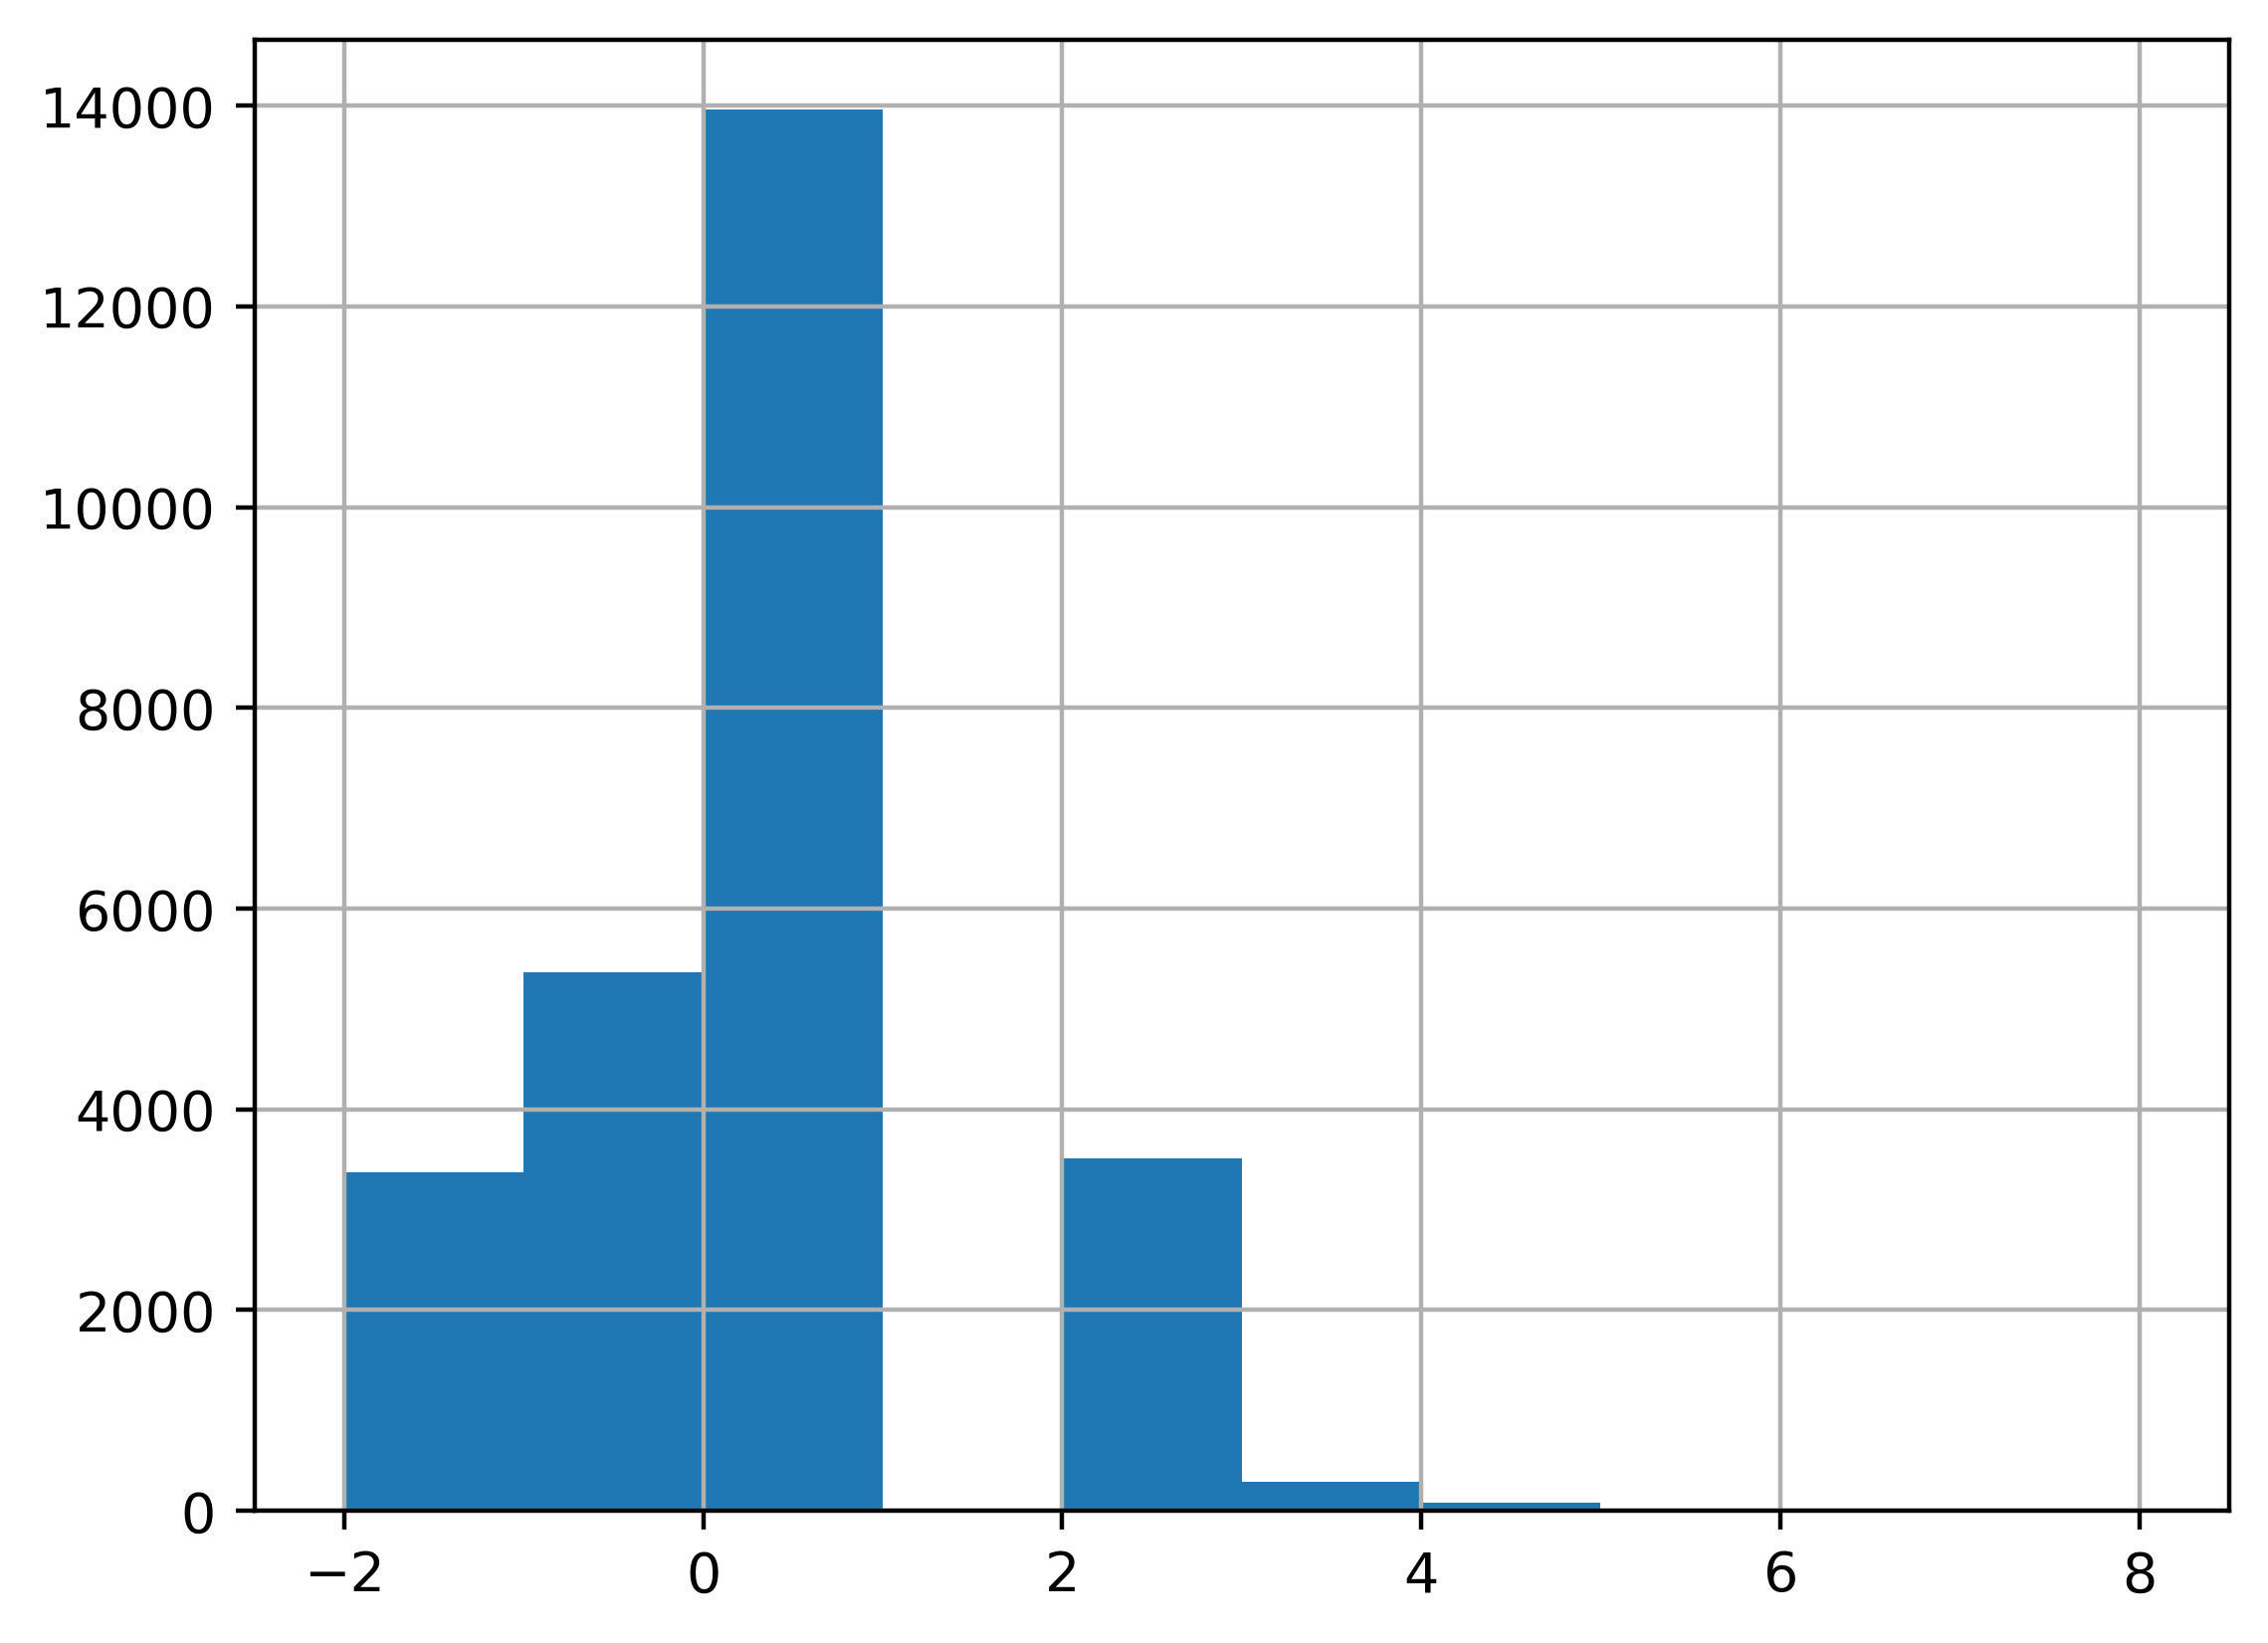

In [50]:
df[pay_feats[0]].hist()

In [51]:
# ajustando número de bins, porque estamos plotando 10 bins para 11 features
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

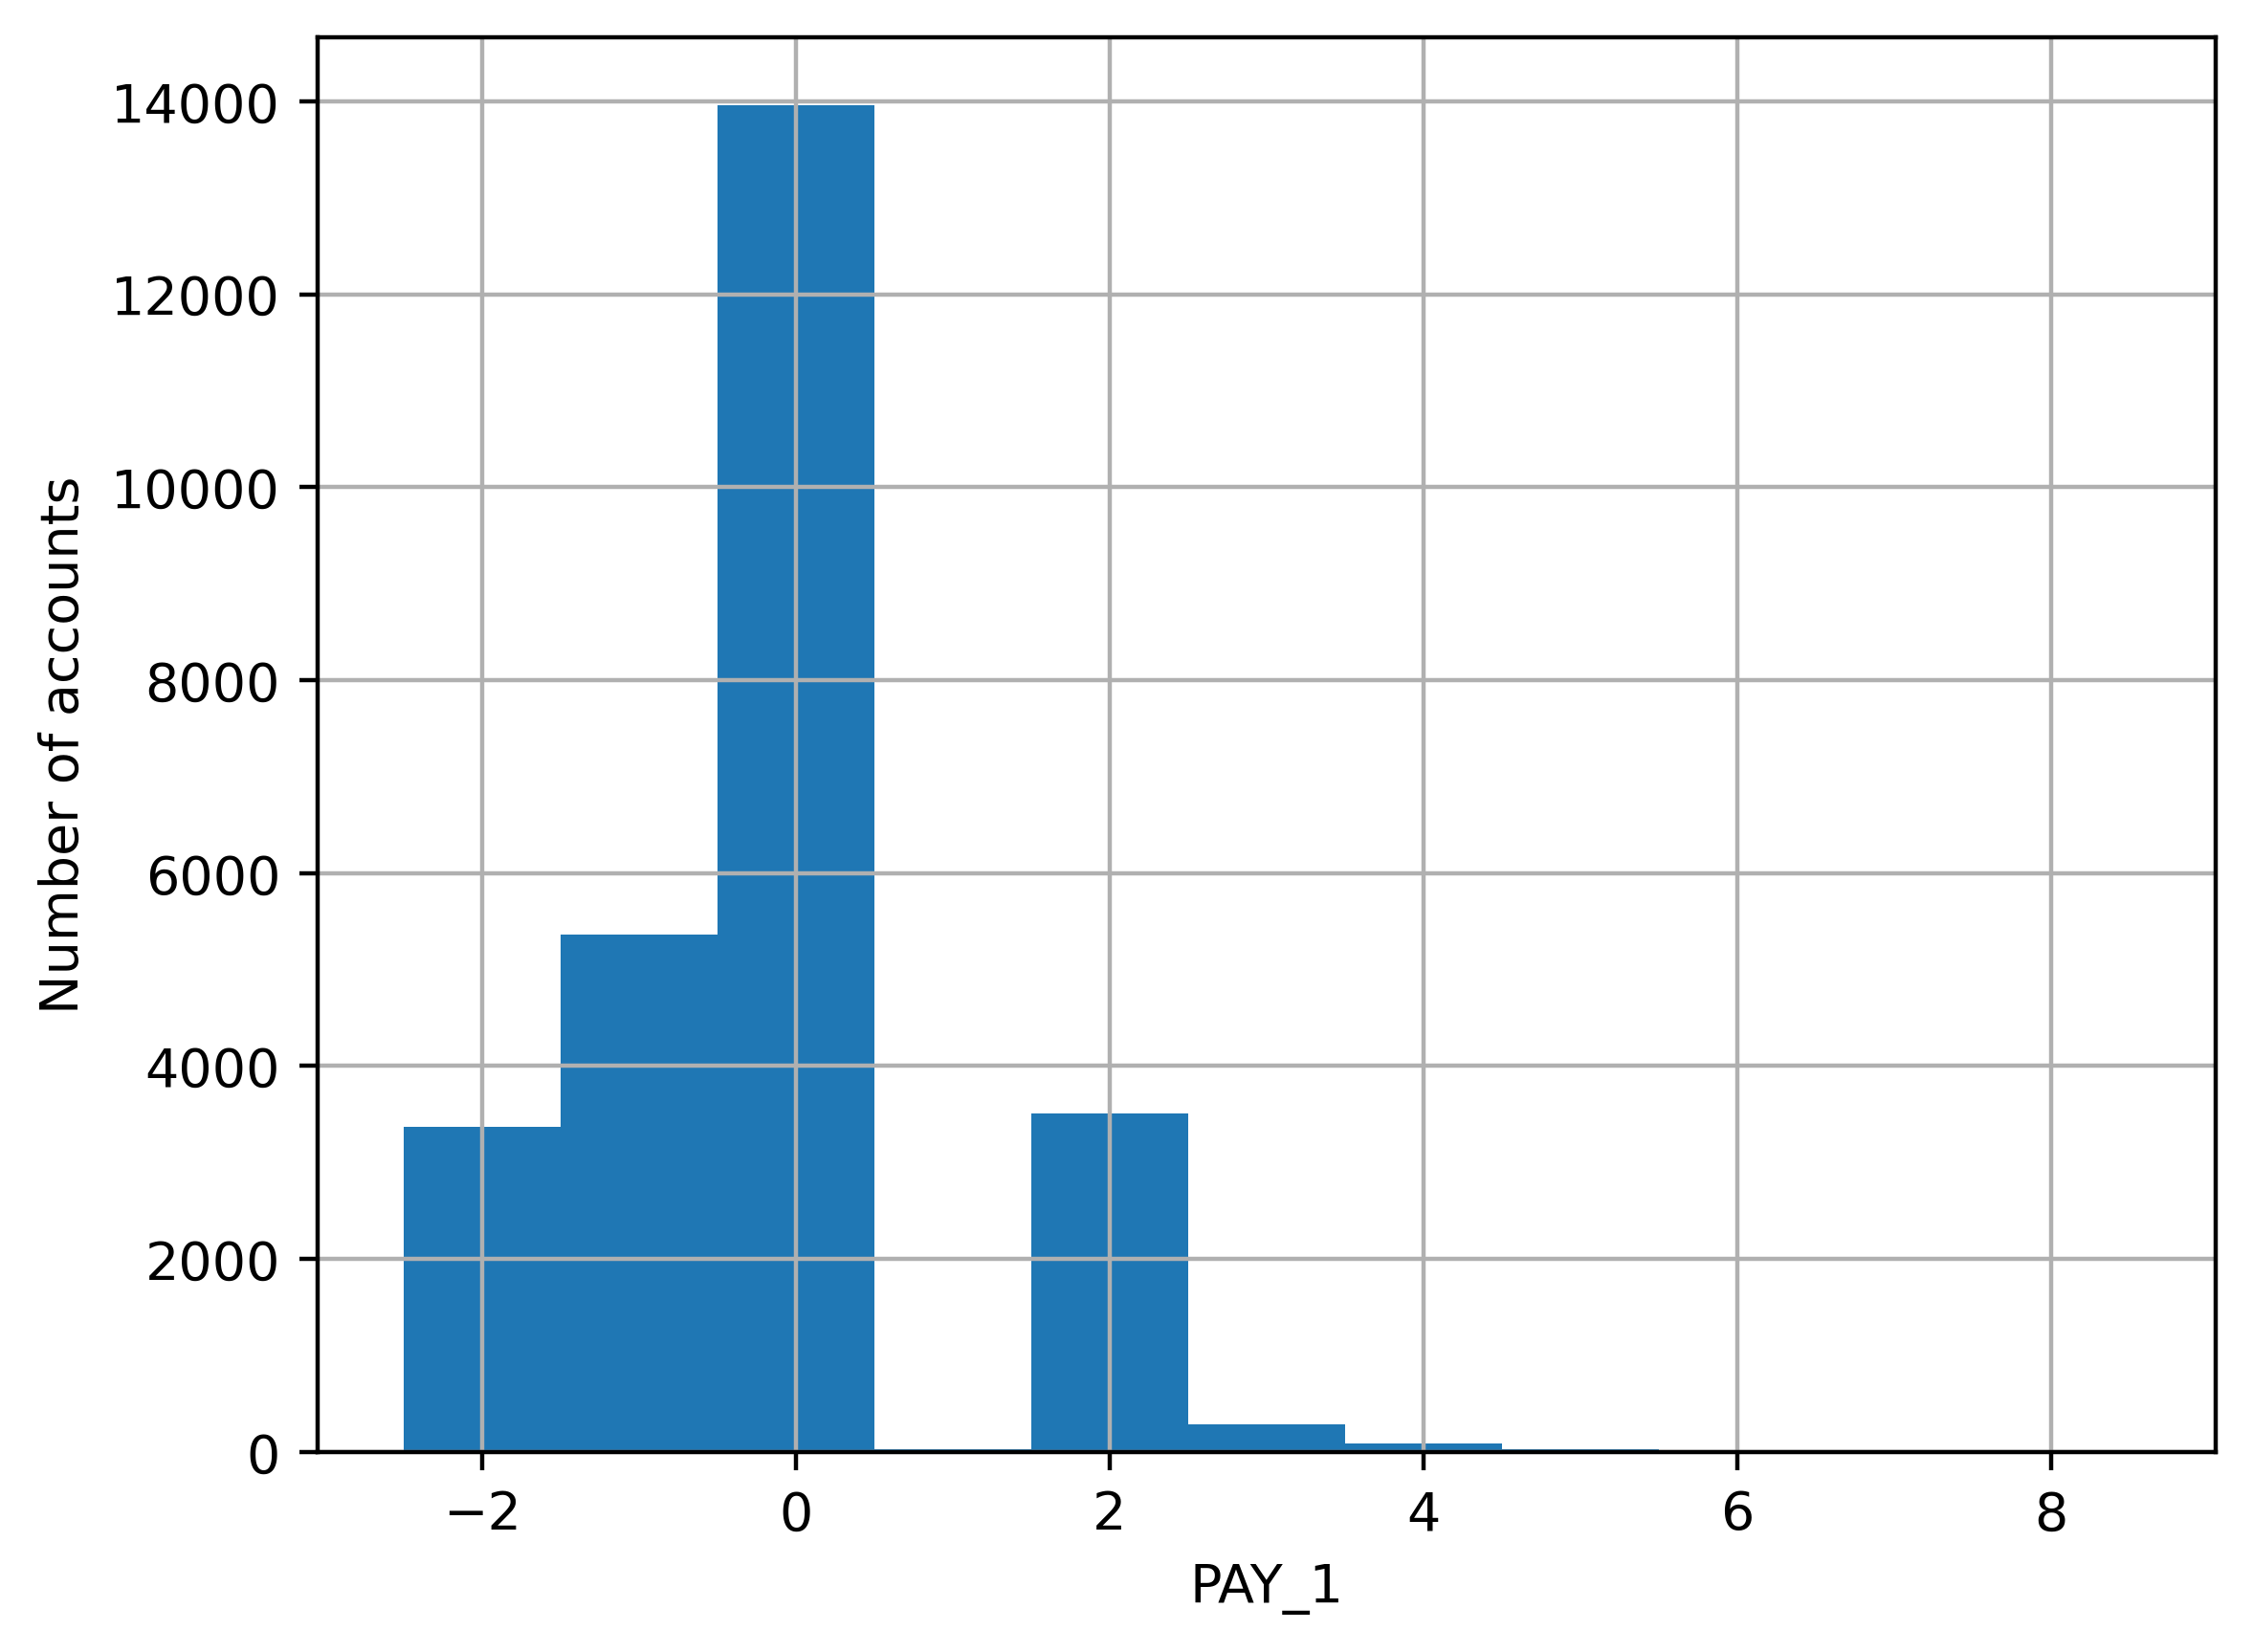

In [52]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

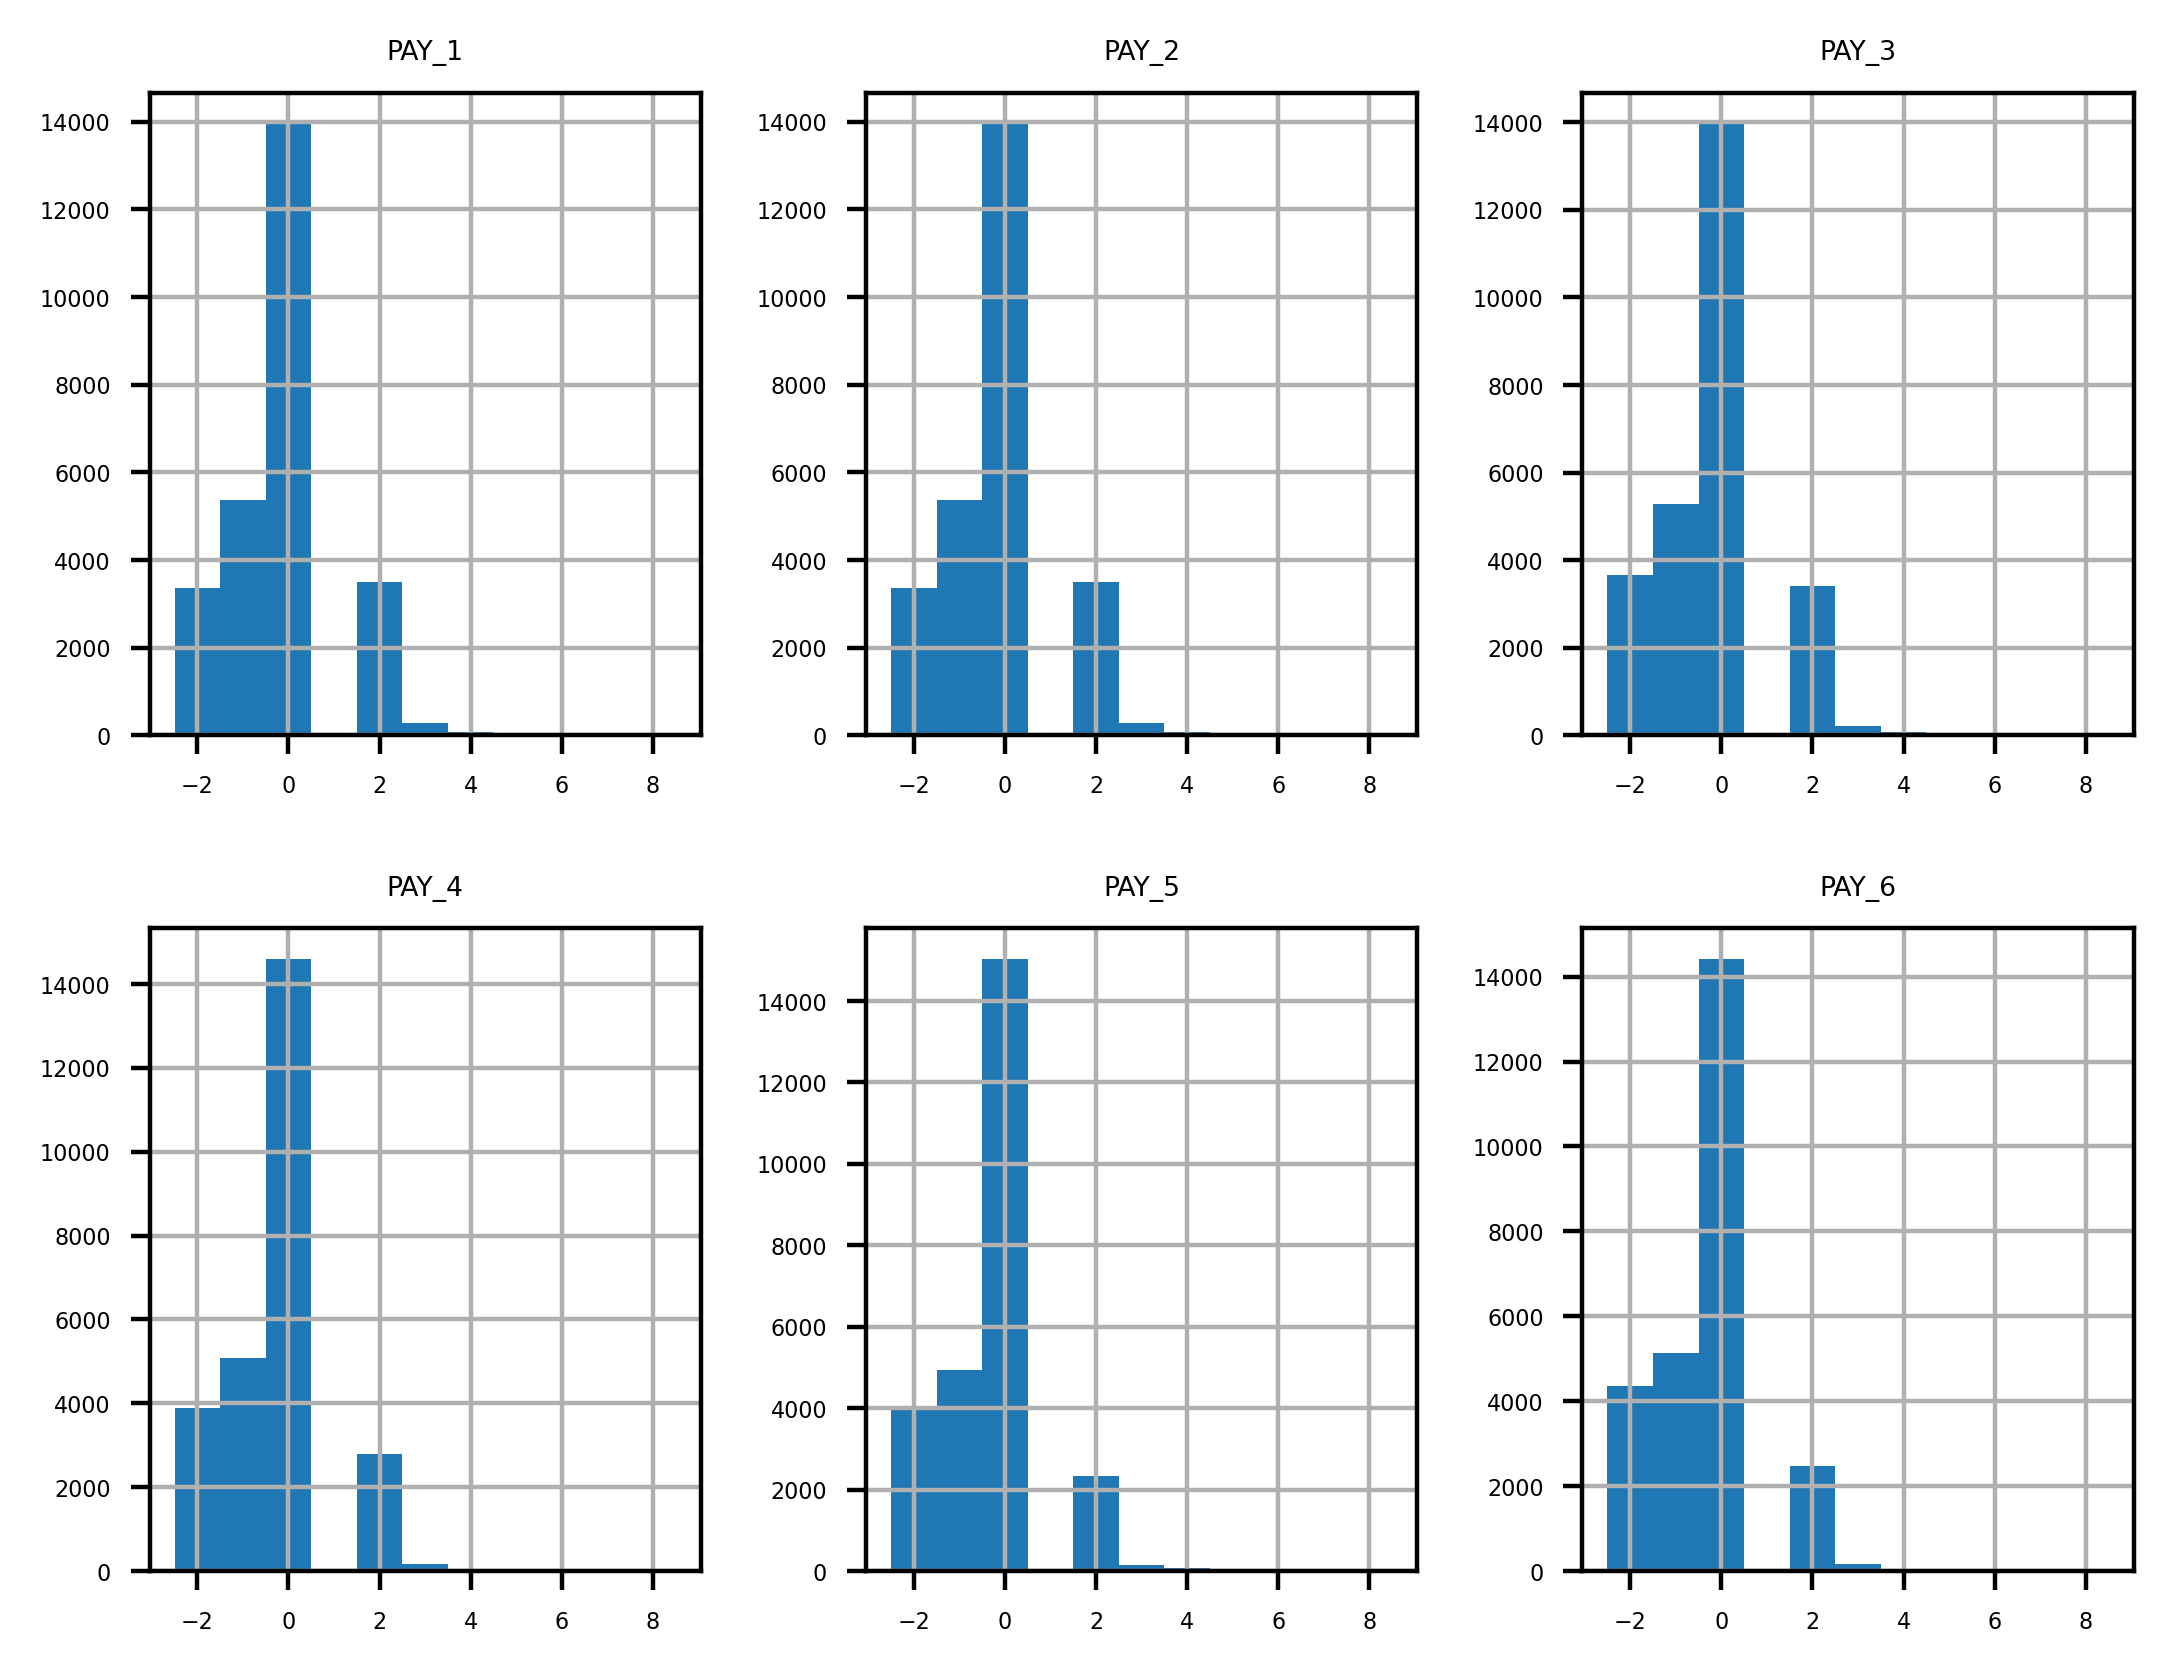

In [53]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [54]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


In [55]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['font.size'] = 4 #font size for figures

1. Create lists of feature names for the remaining financial features. 
2. Use .describe() to examine statistical summaries of the bill amount 
features. Reflect on what you see. Does it make sense?
3. Visualize the bill amount features using a 2 by 3 grid of histogram plots.
Hint: You can use 20 bins for this visualization.
4. Obtain the .describe() summary of the payment amount features. Does it 
make sense?
5. Plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the xrot keyword 
argument so that they don't overlap. In any plotting function, you can include the 
xrot=<angle> keyword argument to rotate x-axis labels by a given angle in 
degrees. Consider the results.
6. Use a Boolean mask to see how much of the payment amount data is exactly 
equal to 0. Does this make sense given the histogram in the previous step?
7. Ignoring the payments of 0 using the mask you created in the previous step, 
use pandas' .apply() and NumPy's np.log10() to plot histograms of 
logarithmic transformations of the non-zero payments. Consider the results.
Hint: You can use .apply() to apply any function, including log10, to 
all the elements of a DataFrame or a column using the following syntax: 
.apply(<function_name>). 

In [56]:
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [57]:
# 01. Create lists of feature names for the remaining financial features.
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [59]:
# 02. Use .describe() to examine statistical summaries of the bill amount features. Reflect on what you see. Does it make sense?
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

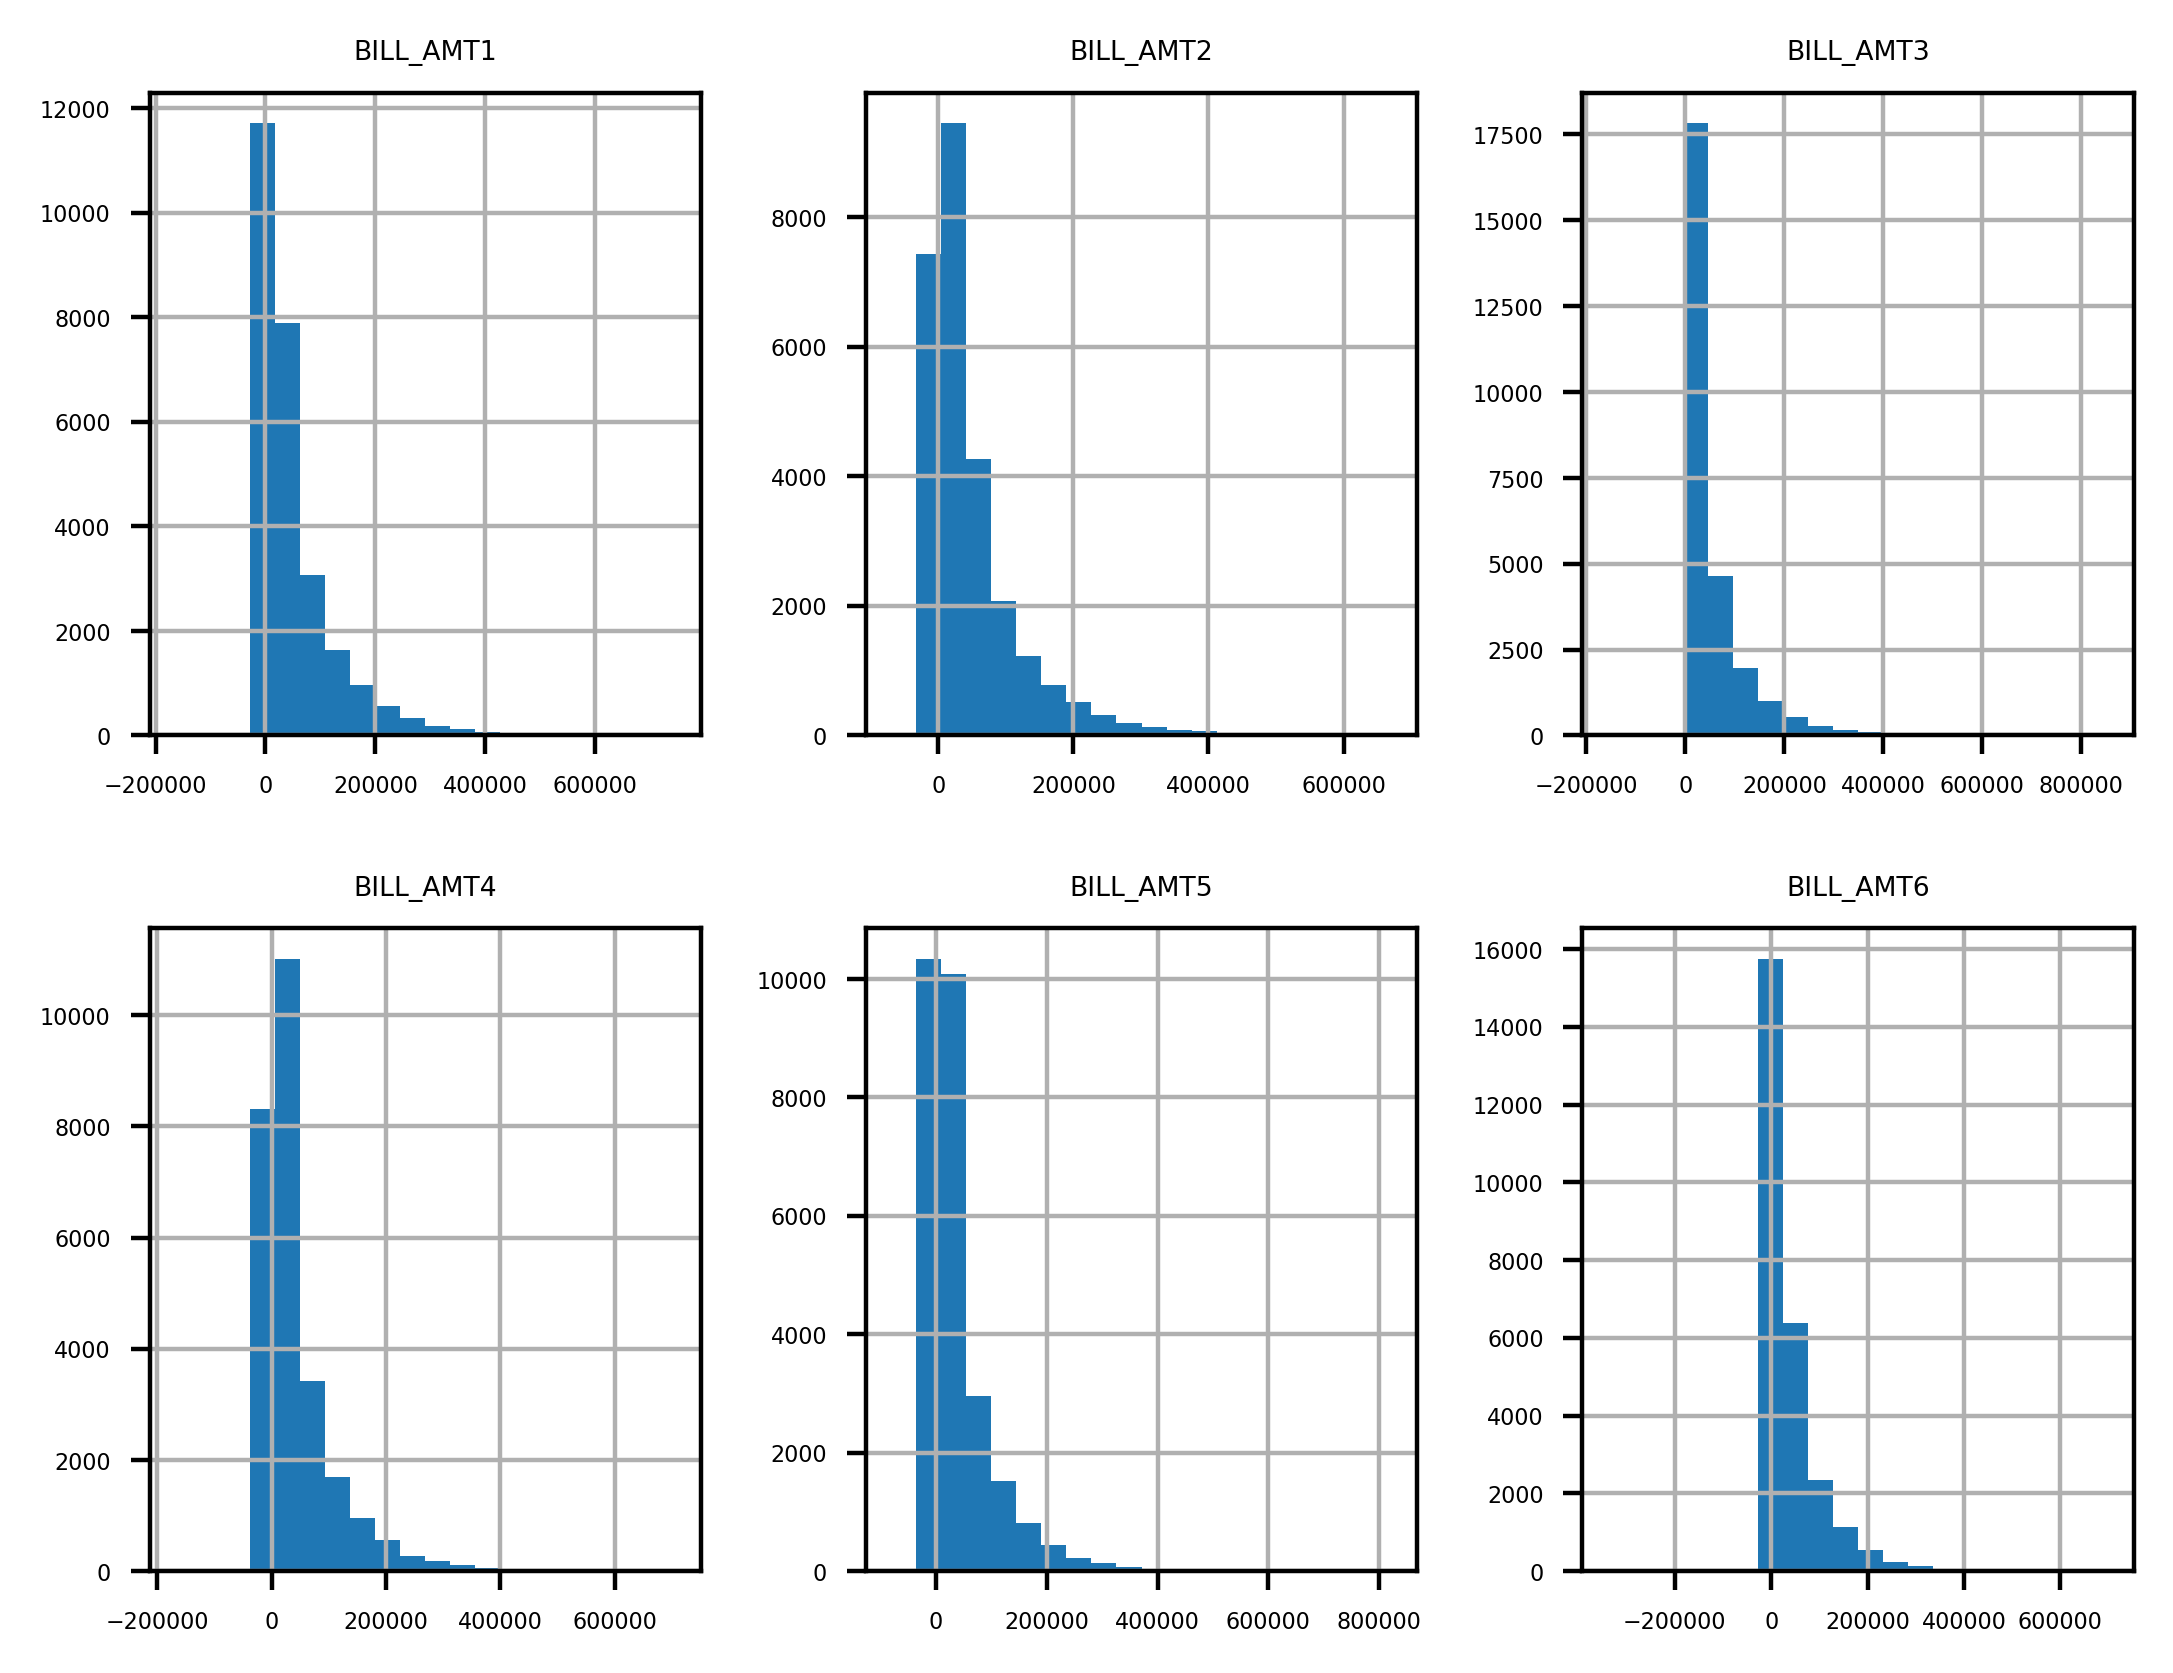

In [64]:
# 03. Visualize the bill amount features using a 2 by 3 grid of histogram plots. Hint: You can use 20 bins for this visualization.
df[bill_feats].hist(bins=20, layout=(2,3))

In [65]:
# 04. Obtain the .describe() summary of the payment amount features. Does it make sense?
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

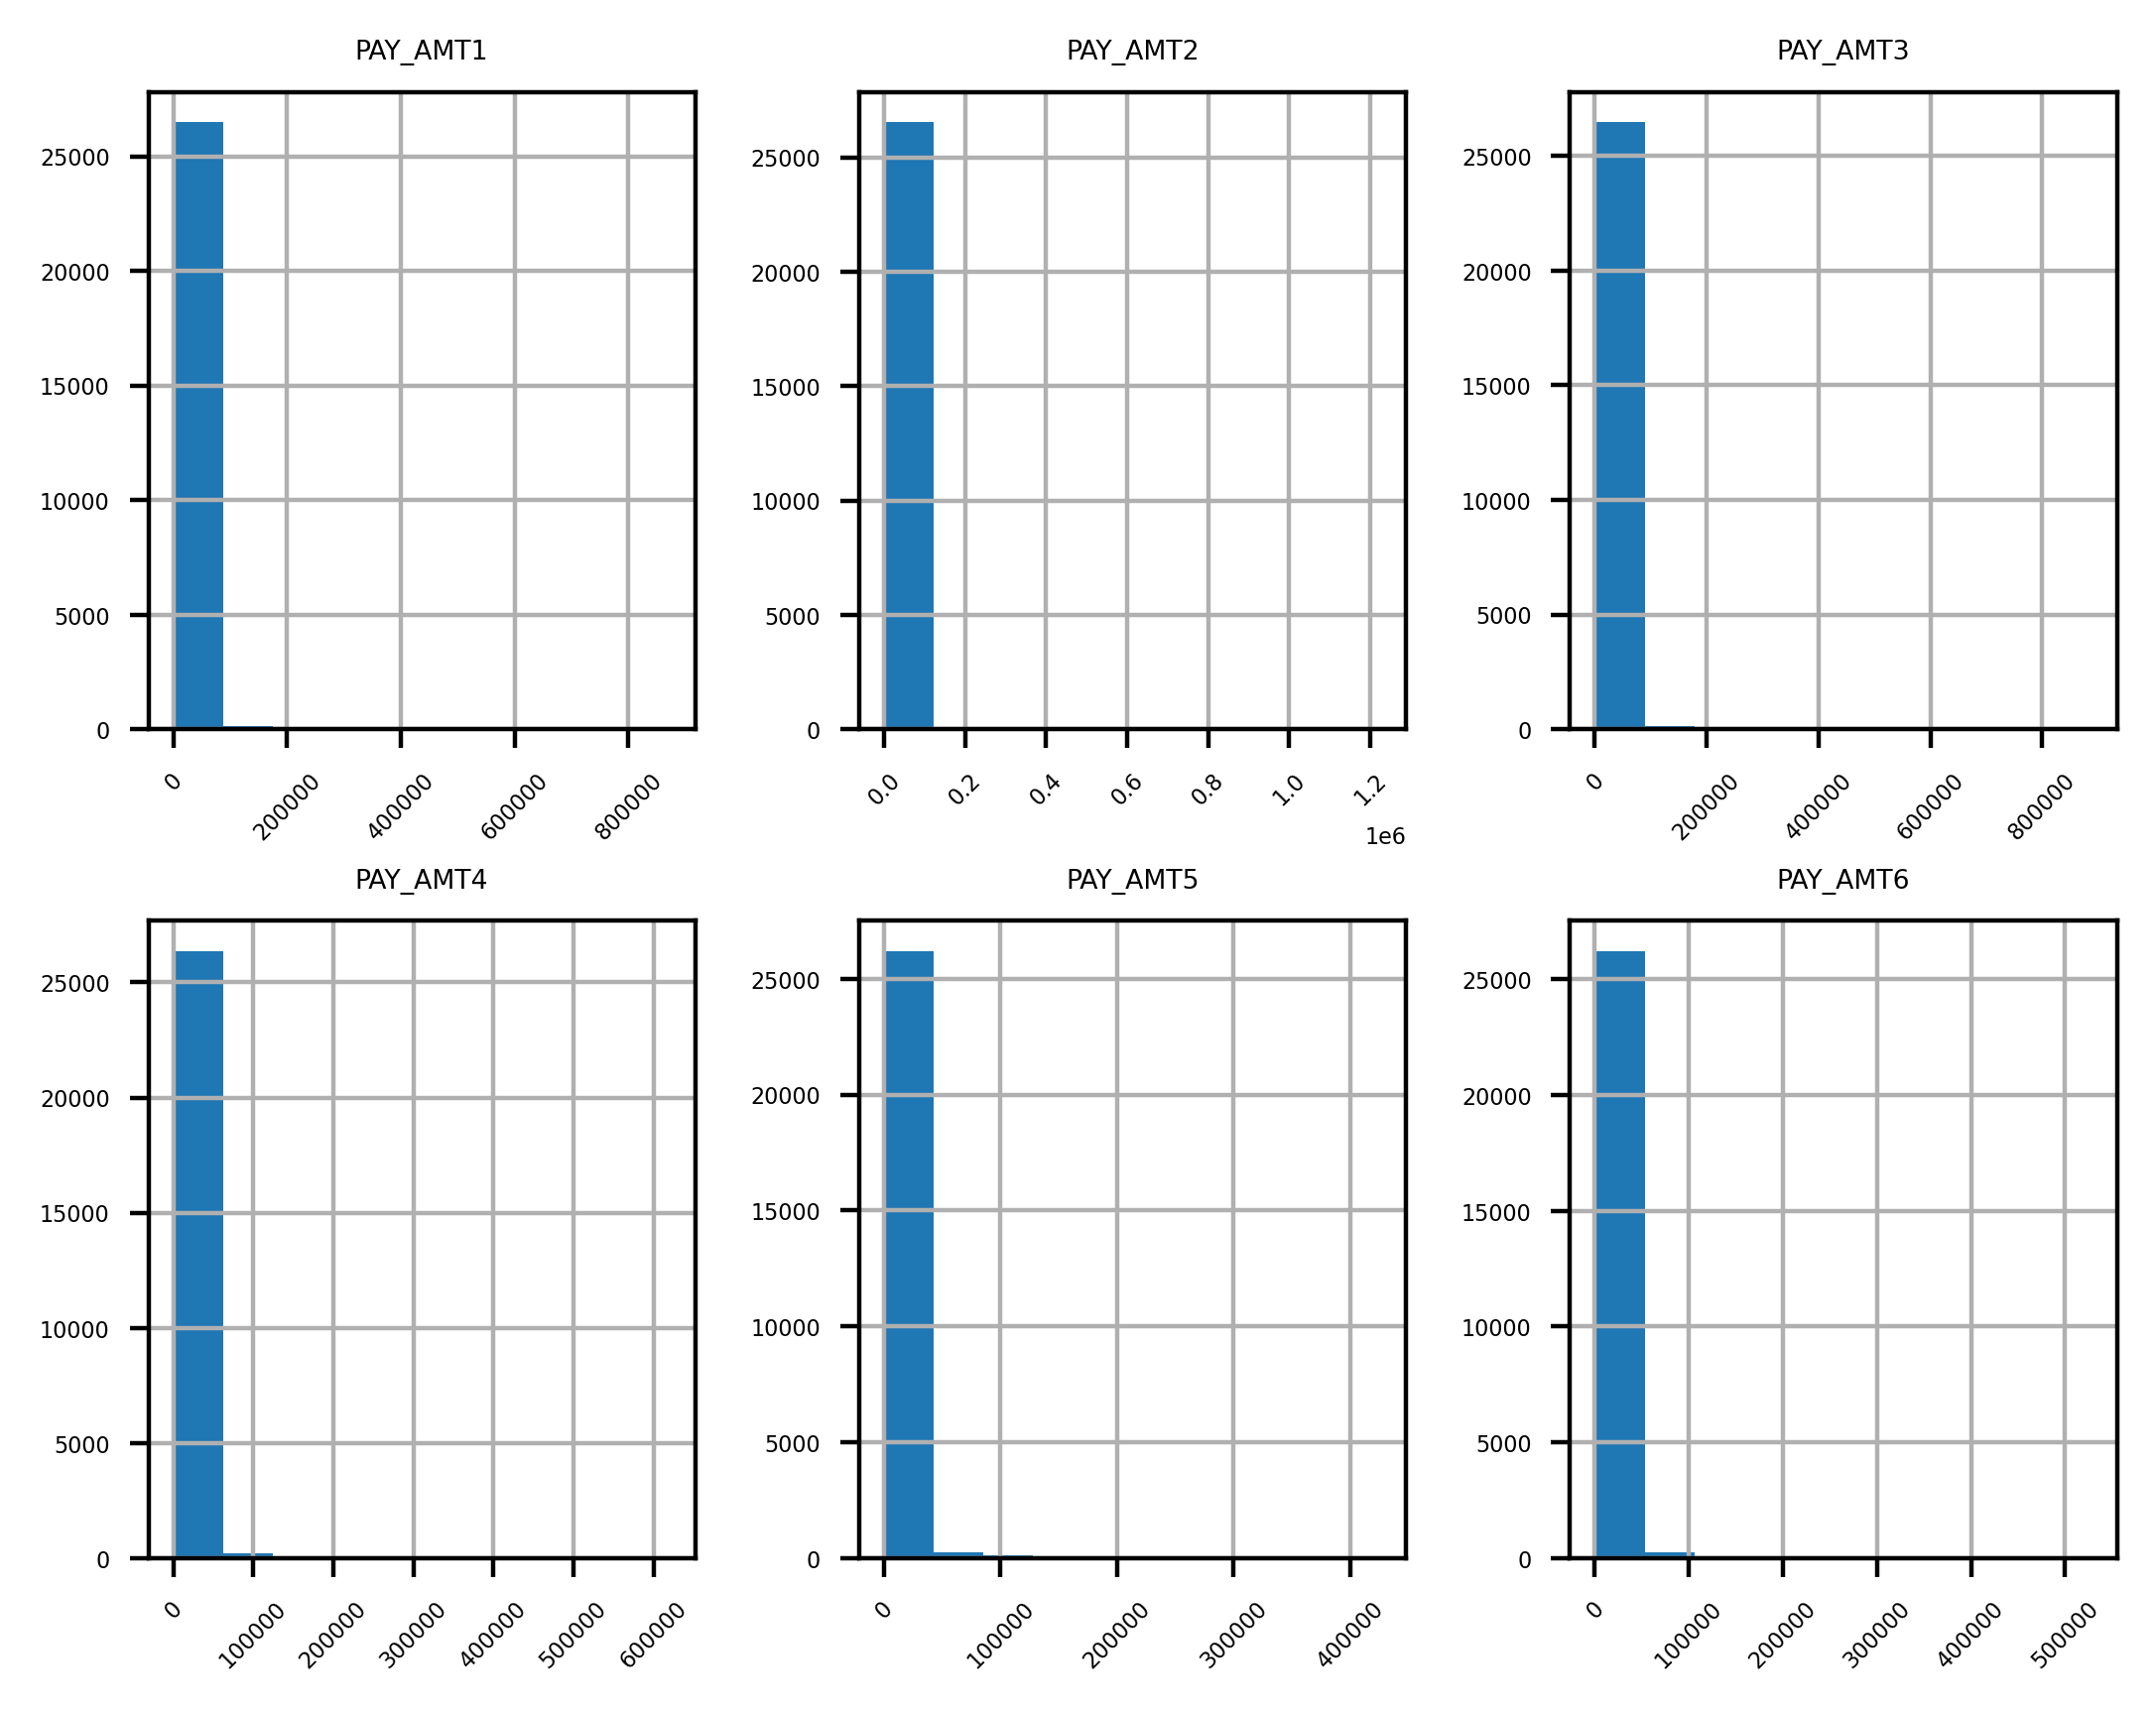

In [66]:
# 5. Plot a histogram of the bill payment features similar to the bill amount features, 
# but also apply some rotation to the x-axis labels with the xrot keyword argument so that they don't overlap. 
# In any plotting function, you can include the xrot=<angle> keyword argument to rotate x-axis labels by a given angle in 
# degrees. Consider the results.

df[pay_amt_feats].hist(layout=(2,3), xrot=45)

In [67]:
# 6. Use a Boolean mask to see how much of the payment amount data is exactly equal to 0. Does this make sense given the histogram in the previous step?
pay_zero_mask = df[pay_amt_feats] == 0
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [68]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

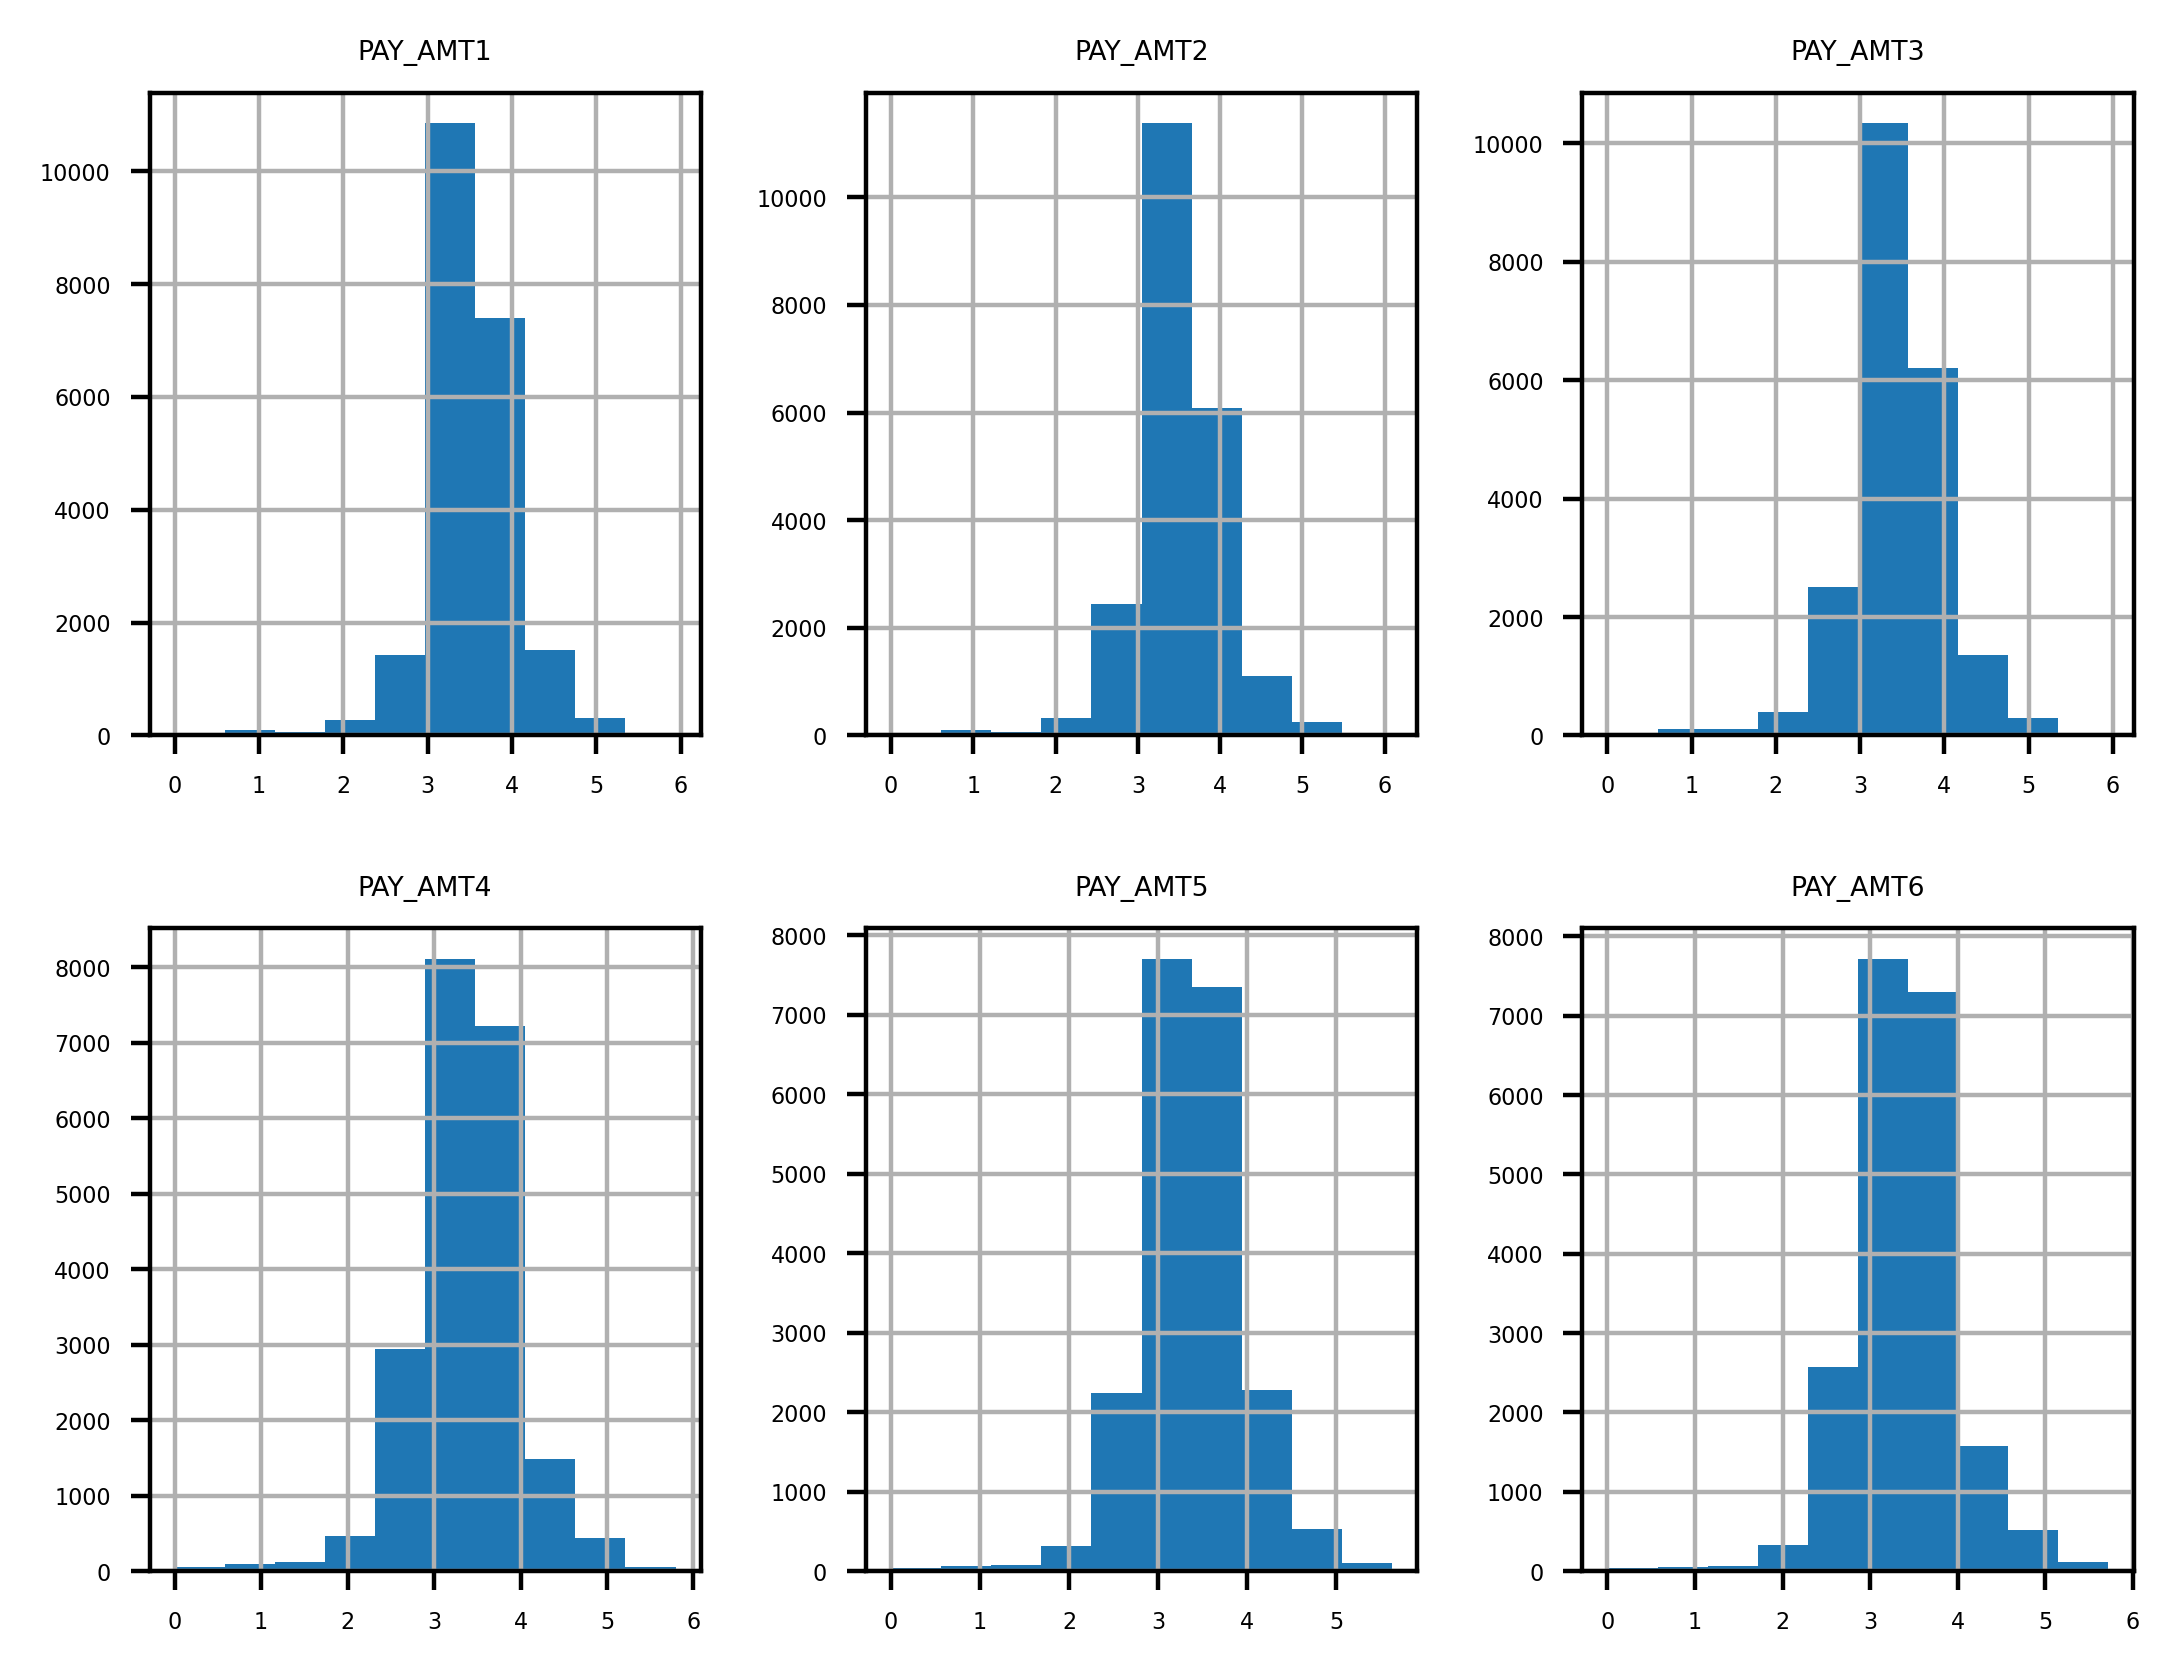

In [70]:
# 7. Ignoring the payments of 0 using the mask you created in the previous step, use pandas' .apply() and NumPy's np.log10() to plot histograms of 
# logarithmic transformations of the non-zero payments. Consider the results.
# Hint: You can use .apply() to apply any function, including log10, to all the elements of a DataFrame or a column using the following syntax: 
# .apply(<function_name>).

df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))